### **The Sparks Foundation Internship** 

Task-3 Exploratory Data Analysis - Retail

By: Sarvesh Musrif

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv("/content/SampleSuperstore.csv")

Exploring the Dataset

In [3]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.shape

(9994, 13)

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#Finding null values from datset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


Analyzing the Dataset step by step

In [9]:
df['Category'].unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
df[df['Category']=='Furniture'].Profit.sum()

18451.272800000006

In [11]:
df[df['Category']=='Office Supplies'].Profit.sum()

122490.8008

In [12]:
df[df['Category']=='Technology'].Profit.sum()

145454.9481

In [13]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [14]:
df[df['Sub-Category']=='Bookcases'].Profit.sum()


-3472.5559999999996

In [15]:
df[df['Sub-Category']=='Chairs'].Profit.sum()

26590.1663

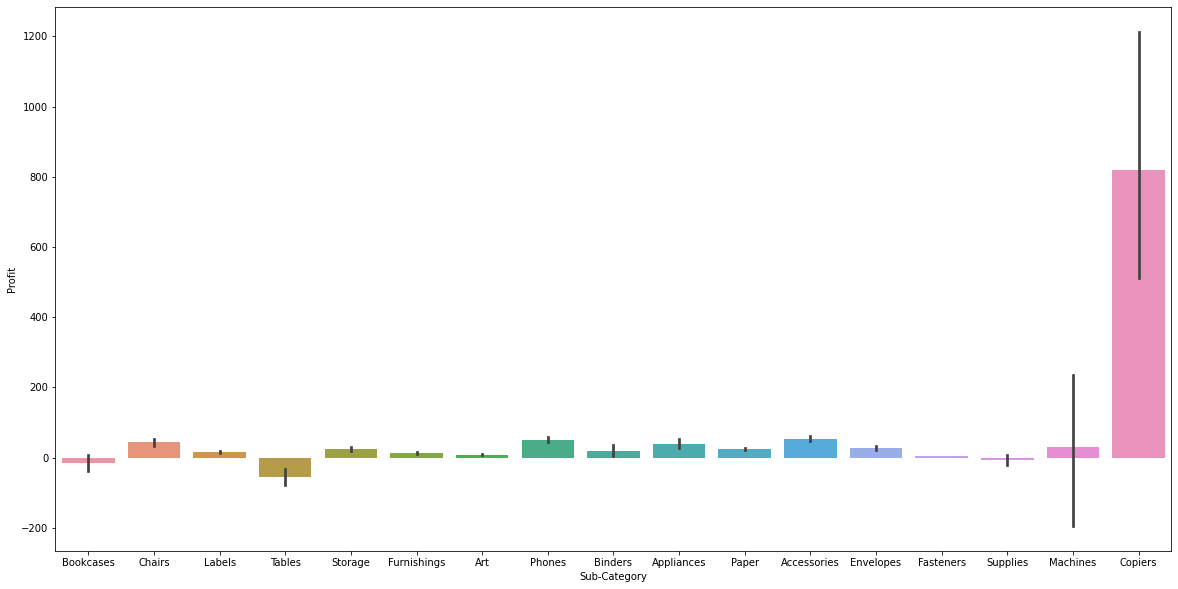

In [16]:
#Instead of finding profit each sub-categories we can simply plot the graph and see the profit made by each sub-categories
plt.figure(figsize=(20,10))
sns.barplot(x=df['Sub-Category'],y=df['Profit'])
plt.show()

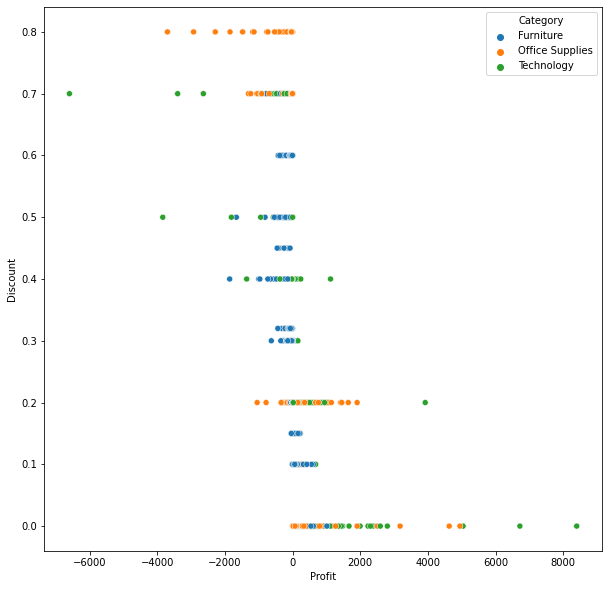

In [17]:
#Finding how much discount was given for each sale
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Profit'],y=df['Discount'],hue=df['Category'])
plt.show()

As we can see more discount was given on the sales of Office Supplies.

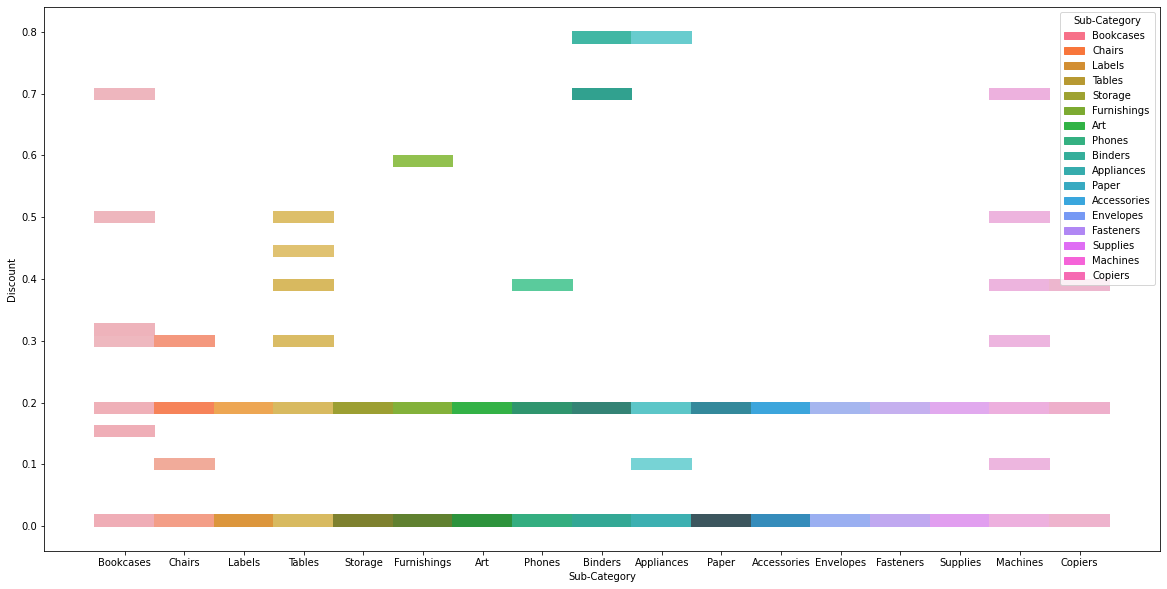

In [18]:
#Now let us find how much discount was given to sub-categories
plt.figure(figsize=(20,10))
sns.histplot(x=df['Sub-Category'],y=df['Discount'],hue=df['Sub-Category'])
plt.show()

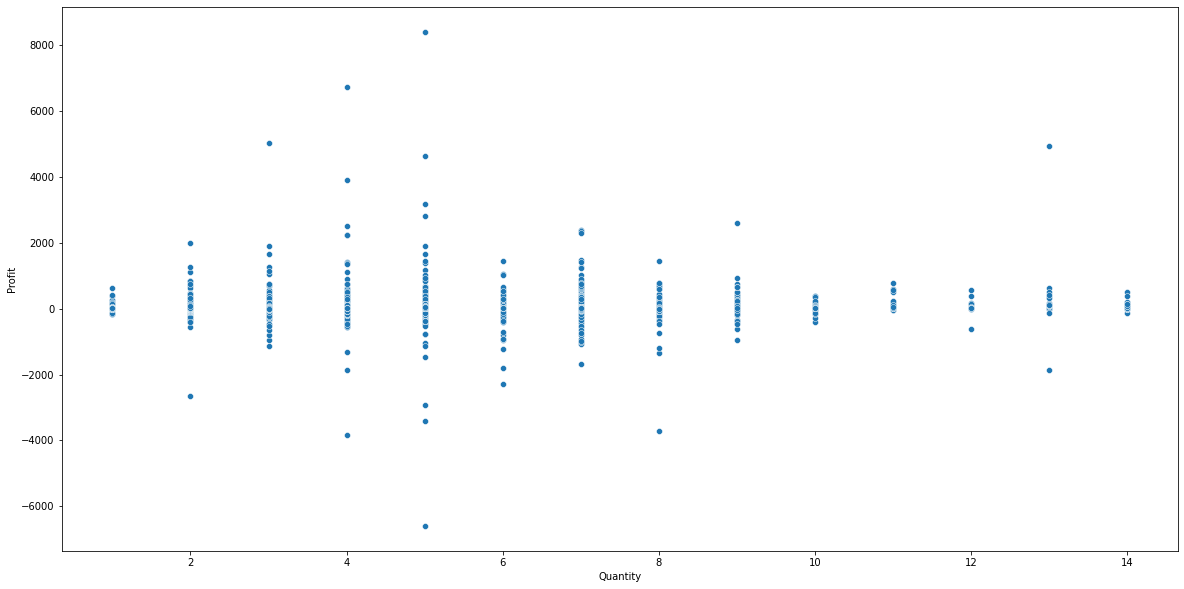

In [19]:
#How much profit is made by selling how much quantities
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['Quantity'],y=df['Profit'])
plt.show()
#we can see higher the quantities lower is the loss 

In [20]:
#States with hightest number of profits
high_profit = df[df['Profit']>1]
high_profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


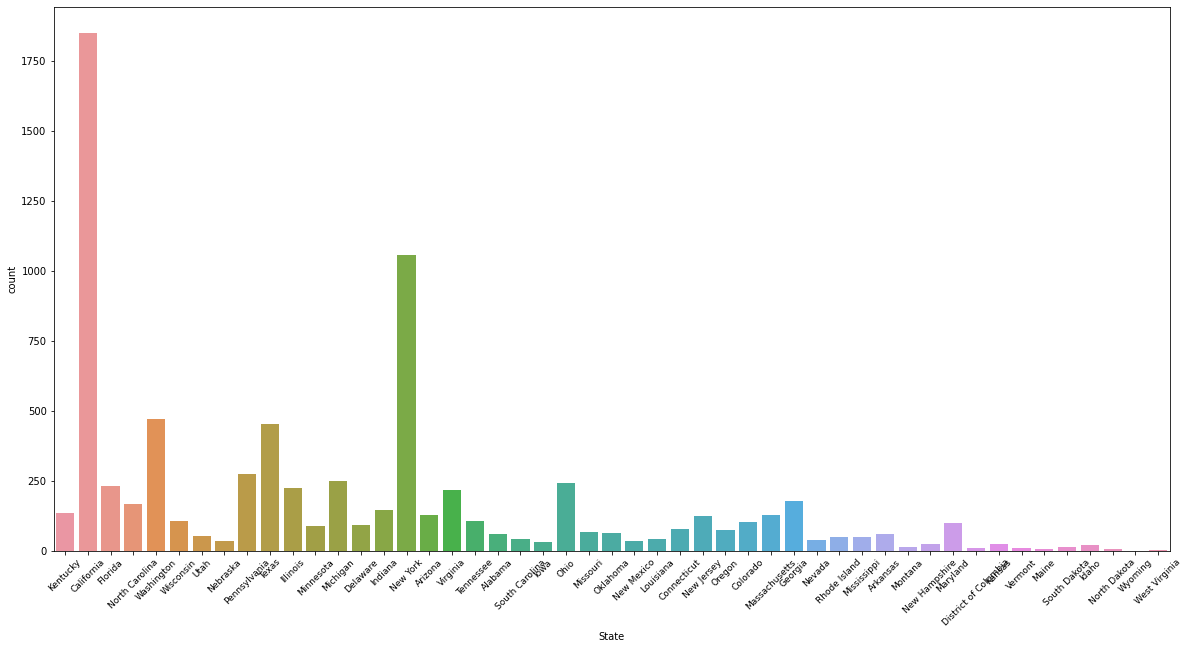

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x=high_profit['State'])
plt.xticks(rotation=45,size=9)
plt.show()

In [22]:
#Finding states with hightest sales
high_sales= df[df['Sales']>3000]
high_sales.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
165,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,8159.952,8,0.4,-1359.9920
251,Standard Class,Consumer,United States,San Diego,California,92037,West,Technology,Accessories,3347.370,13,0.0,636.0003
262,Second Class,Corporate,United States,Houston,Texas,77036,Central,Technology,Machines,3059.982,3,0.4,-509.9970
318,Standard Class,Home Office,United States,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900


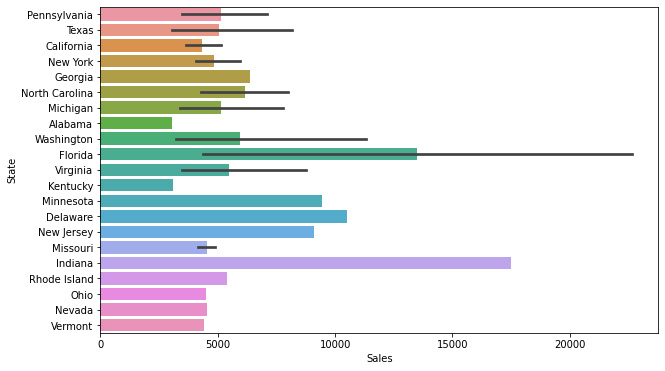

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=high_sales["Sales"],y=high_sales["State"],data=high_sales)
plt.show()


In [24]:
#Finding states with lowest sales data
low_sales=df[df['Sales']<1]
low_sales.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2106,Same Day,Corporate,United States,Mesquite,Texas,75150,Central,Office Supplies,Binders,0.876,1,0.8,-1.4016
2761,First Class,Home Office,United States,San Francisco,California,94110,West,Technology,Accessories,0.990,1,0.0,0.4356
4101,Standard Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100
4711,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Binders,0.852,1,0.7,-0.5964
7548,Standard Class,Corporate,United States,Huntsville,Texas,77340,Central,Office Supplies,Binders,0.898,1,0.8,-1.5715


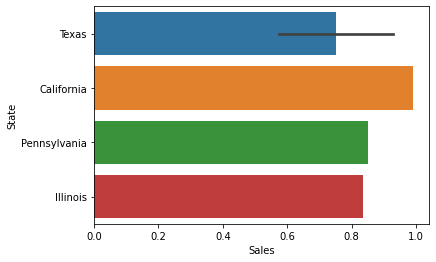

In [25]:
sns.barplot(x=low_sales['Sales'],y=low_sales['State'],data=low_sales)
plt.show()

In [26]:
#Finding which category made least profit
profit = df[df['Profit']<1]
profit.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


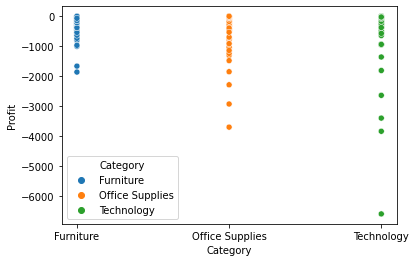

In [27]:
sns.scatterplot(x=profit['Category'],y=profit['Profit'],hue=profit['Category'])
plt.show()

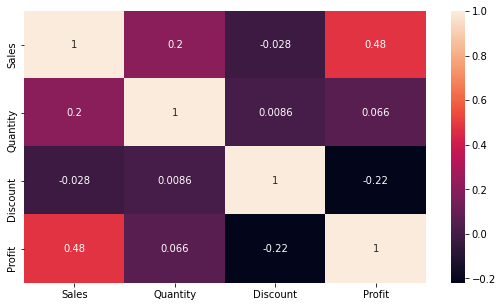

In [28]:
#Heatmap of correlation matrix
data=['Sales','Quantity','Discount','Profit']
plt.figure(figsize=(9,5))
sns.heatmap(df[data].corr(),annot=True )
plt.show()

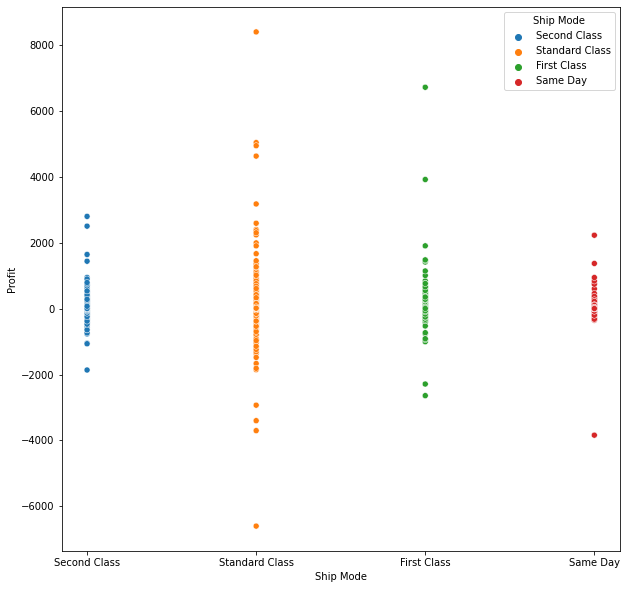

In [29]:
#Analyzing profit made by each ship mode
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Ship Mode'],y=df['Profit'],hue=df['Ship Mode'])

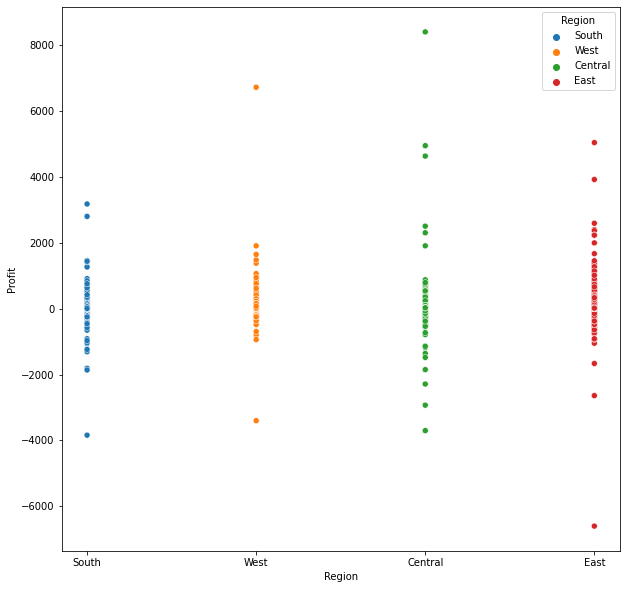

In [30]:
#Analyzing profit made by each region
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Region'],y=df['Profit'],hue=df['Region'])

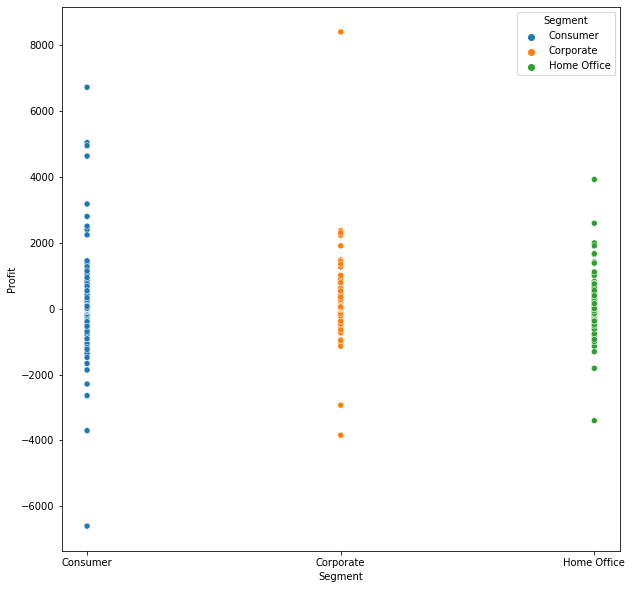

In [31]:
#Finding profit made by each segment
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Segment'],y=df['Profit'],hue=df['Segment'])
plt.show()

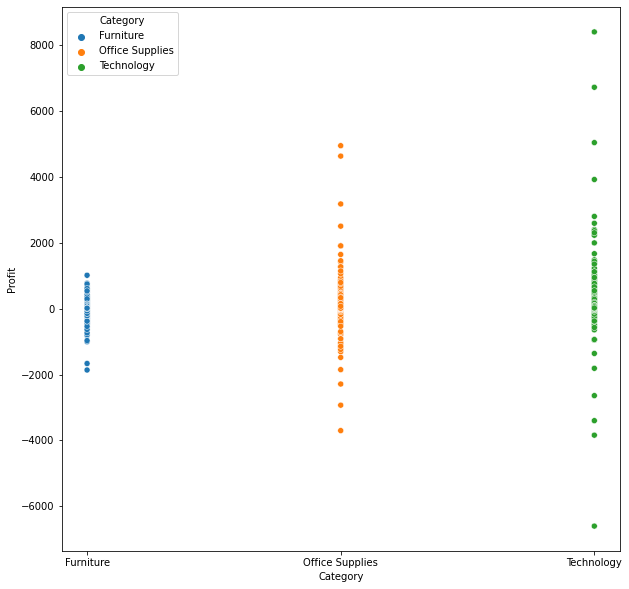

In [32]:
#Analyzing profit made by each category
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Category'],y=df['Profit'],hue=df['Category'])
plt.show()

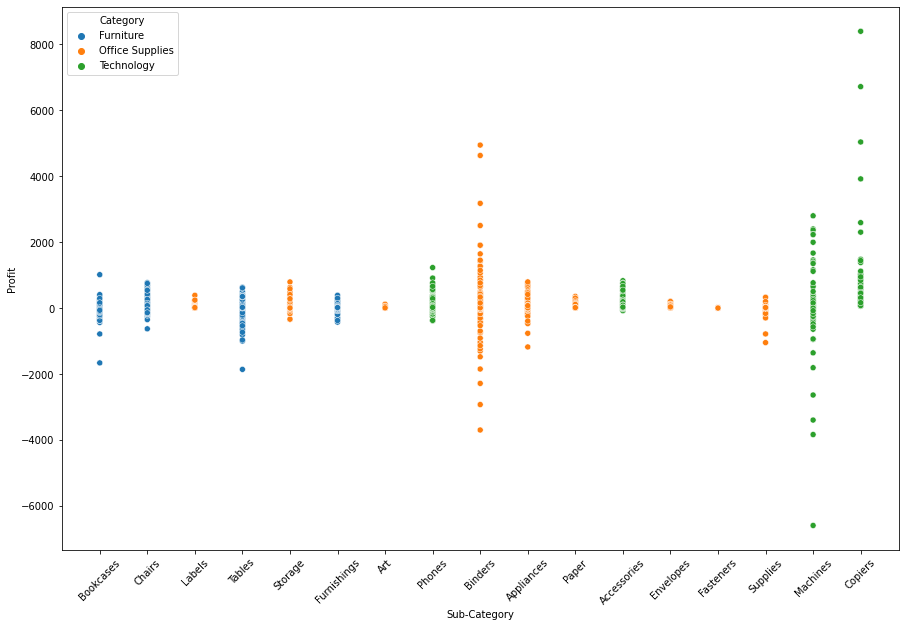

In [33]:
#Analyzing profit made by sub-categories
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Sub-Category'],y=df['Profit'],hue=df['Category'])
plt.xticks(rotation=45)
plt.show()

# **Conclusion**

1] It is necessary to increase the sales of Furniture to generate more profit as it has made least amongst all other Categories.

2] The Discount rates should be adjusted according to the number of quantities.

3] States like Texas,California,pennsylvania,illinois should make more sales in each categories.

4] Increase Profit generated in Office Supplies.